In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)

In [2]:
data = np.loadtxt("nb_05.46.33_1374.dat", unpack=True)
print(data[0])

[ 70.688751  71.003723  70.976791  71.098129  71.38015   71.175652
  70.521255  71.270447  71.868477  71.963951  72.000687  73.049805
  73.946419  74.742477  74.79425   74.674133  75.205696  75.703461
  74.915024  73.943665  70.596687  67.163849  67.613556  68.146881
  68.341072  68.683884  68.144112  67.314392  67.730286  67.240746
  66.590424  66.202263  65.368332  65.437477  65.39521   64.711304
  63.017681  62.644165  61.934925  61.035015  60.983482  61.106422
  61.322384  62.74263   63.140308  62.759007  63.283348  63.206158
  64.495392  65.141029  65.340439  65.397354  65.011589  66.190529
  67.610626  67.911201  68.940903  69.556564  69.858192  69.975815
  69.876167  68.920288  68.72683   68.90358   68.37146   68.032082
  67.582382  66.740295  66.948456  66.225876  65.818649  65.787262
  65.024796  65.072197  65.069908  65.668205  65.352798  65.43927
  64.792824  64.532082  64.678337  64.268845  62.815796  62.360325
  61.617622  60.639481  60.537971  60.59948   60.994003  61.249

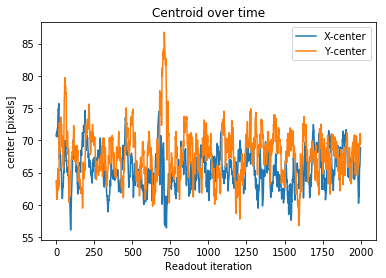

In [3]:
plt.plot (data[0], label="X-center")
plt.plot (data[1], label="Y-center")
plt.legend()
plt.title ("Centroid over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("center [pixels]")
plt.savefig (" nb_05.46.33_1374-xycentroid.png")

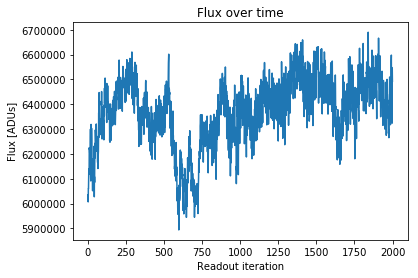

In [4]:
plt.figure()
plt.plot (data[2])
plt.title("Flux over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Flux [ADUs]")
plt.savefig (" nb_05.46.33_1374-flux.png")

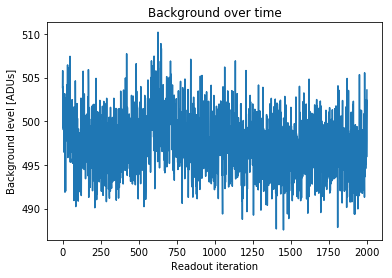

In [5]:
plt.figure()
plt.plot (data[3])
plt.title("Background over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Background level [ADUs]")
plt.savefig (" nb_05.46.33_1374-background.png")

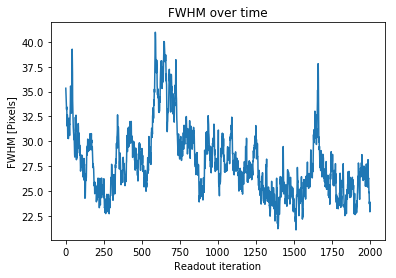

In [6]:
plt.figure()
plt.plot (data[4])
plt.title("FWHM over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("FWHM [Pixels]")
plt.savefig (" nb_05.46.33_1374-fwhm.png")

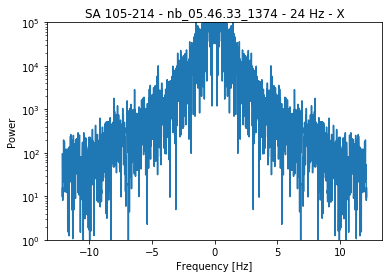

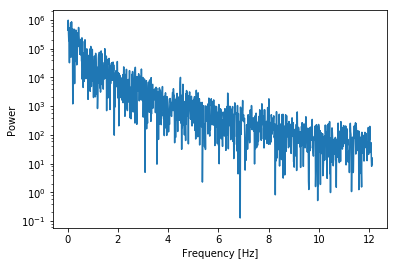

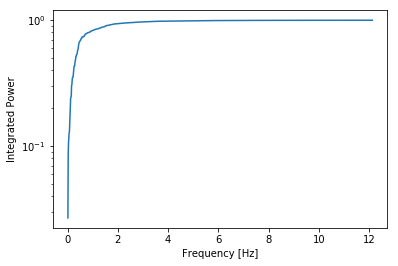

In [7]:
indata = data[0]# - np.mean (data[0])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.041195 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nb_05.46.33_1374 - 24 Hz - X")
plt.savefig (" nb_05.46.33_1374-powerspectrum.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nb_05.46.33_1374-power.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nb_05.46.33_1374-integratedpower.png")

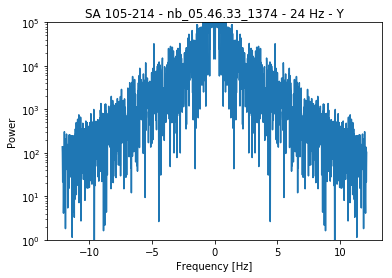

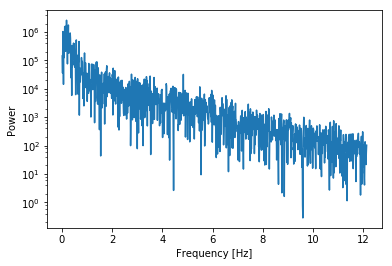

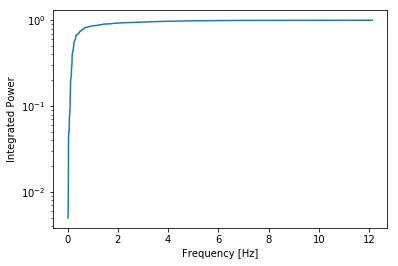

In [8]:
indata = data[1]# - np.mean (data[1])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.041195 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nb_05.46.33_1374 - 24 Hz - Y")
plt.savefig (" nb_05.46.33_1374-powerspectrum-y.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nb_05.46.33_1374-power-y.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nb_05.46.33_1374-integratedpower-y.png")